In [7]:
import numpy as np
import pandas as pd

df_feature = pd.read_csv("UCI_HAR_Dataset/features.txt", sep='\s+', header=None)
df_feature

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [8]:
feature_name = df_feature.iloc[:,1].values.tolist() #모든 행의 두번째 열만 보여주기
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [9]:
df_label = pd.read_csv("UCI_HAR_Dataset/activity_labels.txt", sep='\s+', header=None)
df_label

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [10]:
label_name = df_label.iloc[:5,].values.tolist()
label_name[:5]

[[1, 'WALKING'],
 [2, 'WALKING_UPSTAIRS'],
 [3, 'WALKING_DOWNSTAIRS'],
 [4, 'SITTING'],
 [5, 'STANDING']]

In [11]:
X_train = pd.read_csv("UCI_HAR_Dataset/train/X_train.txt", sep='\s+', header=None, encoding='latin-1')
X_train.columns = feature_name
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [12]:
X_test = pd.read_csv("UCI_HAR_Dataset/test/X_test.txt", sep='\s+', header=None, encoding='latin-1')
X_test.columns = feature_name

Y_train = pd.read_csv("UCI_HAR_Dataset/train/Y_train.txt", sep='\s+', header=None, encoding='latin-1')
Y_train.columns = ['action']

Y_test = pd.read_csv("UCI_HAR_Dataset/test/Y_test.txt", sep='\s+', header=None, encoding='latin-1')

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
Y_predict = dt.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_predict)

print(f"Decision Tree 예측 정확도: {accuracy}")
print(f"Hyper Parameter: {dt.get_params()}")

Decision Tree 예측 정확도: 0.8585001696640652
Hyper Parameter: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [20]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt, param_grid = params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, Y_train)

print(f"최고 평균 정확도: {grid_cv.best_score_: .3f}")
print(f"최적 하이퍼매개변수: {grid_cv.best_params_}")

최고 평균 정확도:  0.848
최적 하이퍼매개변수: {'max_depth': 10}


In [21]:
df_result = pd.DataFrame(grid_cv.cv_results_)
df_result[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.842084,0.944913
1,8,0.847532,0.982692
2,10,0.848078,0.993369
3,12,0.841278,0.997212
4,16,0.839781,0.999660
5,20,0.838829,0.999966
6,24,0.838557,1.000000


In [18]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [8,16,20],
    'min_samples_split': [8, 6, 14]
}

grid_cv = GridSearchCV(dt, param_grid = params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, Y_train)

print(f"최고 평균 정확도: {grid_cv.best_score_: .3f}")
print(f"최적 하이퍼매개변수: {grid_cv.best_params_}")

최고 평균 정확도:  0.851
최적 하이퍼매개변수: {'max_depth': 8, 'min_samples_split': 8}


In [ ]:
df_result2 = pd.DataFrame(grid_cv.cv_results_)
df_result2 = [['param_max_depth', 'mean_test_score', 'mean_train_score']]

In [23]:
import numpy as np
import pandas as pd

df_feature = pd.read_csv("UCI_HAR_Dataset/features.txt", sep='\s+', header=None)
df_feature

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [26]:
X_train = pd.read_csv("UCI_HAR_Dataset/train/X_train.txt", sep='\s+', header=None, encoding='latin-1')
X_train.columns = feature_name

X_test = pd.read_csv("UCI_HAR_Dataset/test/X_test.txt", sep='\s+', header=None, encoding='latin-1')
X_test.columns = feature_name

Y_train = pd.read_csv("UCI_HAR_Dataset/train/Y_train.txt", sep='\s+', header=None, encoding='latin-1')
Y_train.columns = ['action']

Y_test = pd.read_csv("UCI_HAR_Dataset/test/Y_test.txt", sep='\s+', header=None, encoding='latin-1')

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features="sqrt", 
    random_state=0
)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

print(accuracy_score(Y_test, Y_pred))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9273837801153716


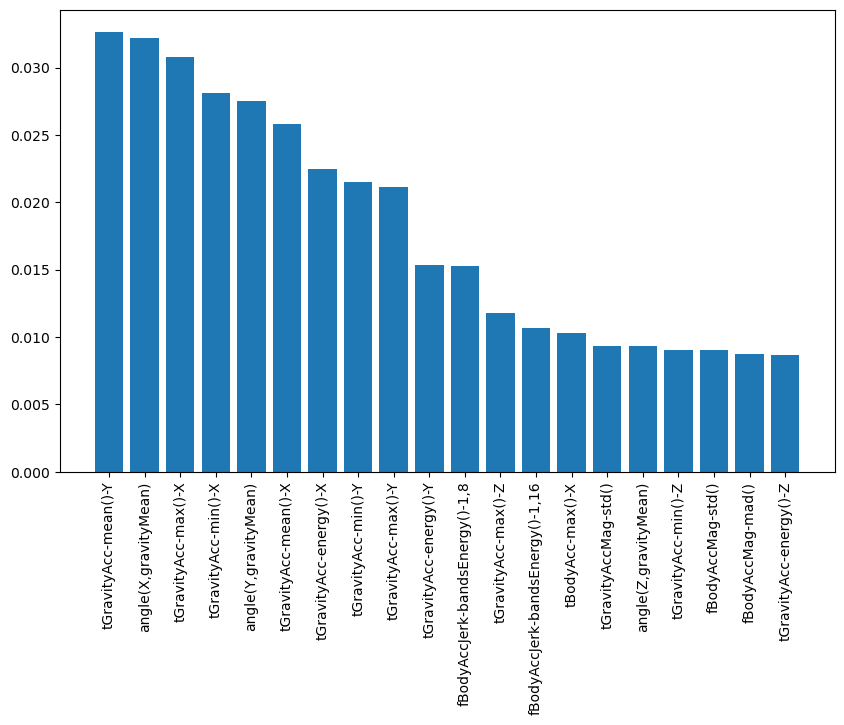

In [30]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
idx = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10,6))
plt.bar(range(20), importances[idx])
plt.xticks(range(20), [feature_name[i] for i in idx], rotation=90)
plt.show()

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


#예측
Y_pred = confusion_matrix(Y_test, Y_pred)

#혼동행렬
cm = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = classification_report(confusion_matrix=cm)

disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()

print(classification_report(Y_test, Y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [2947, 6]